# Логистическая регрессия

<img src='imgs/3d.png'>

<img src='imgs/best.jpg'>

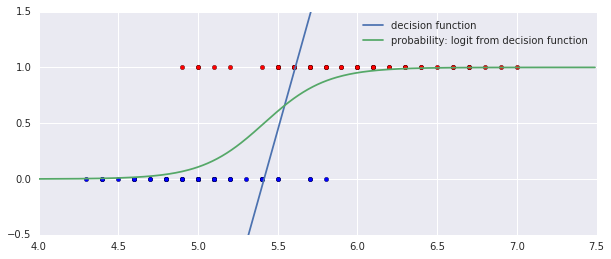

In [235]:
figure(figsize=(10,4))
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2, :]
y = y[y != 2]
X = X[:, [0]]

clf = LogisticRegression(C=5000)
clf.fit(X, y)

X_0 = X[y==0, :]
X_1 = X[y==1, :]


xx = np.arange(4., 7.5, 0.01)

# plot(xx, clf.predict_proba(np.c_[xx])[:,1])

scatter(X_0[:,0], [0] * len(X_0))
scatter(X_1[:,0], [1] * len(X_0), c='r')
plot(xx, clf.decision_function(np.c_[xx]), label='decision function')
plot(xx, 1 / (1 + np.e**-clf.decision_function(np.c_[xx])), label='probability: logit from decision function')
axis([4., 7.5, -0.5, 1.5])
_ = plt.legend()

<img src="imgs/linear.jpg">

Populating the interactive namespace from numpy and matplotlib


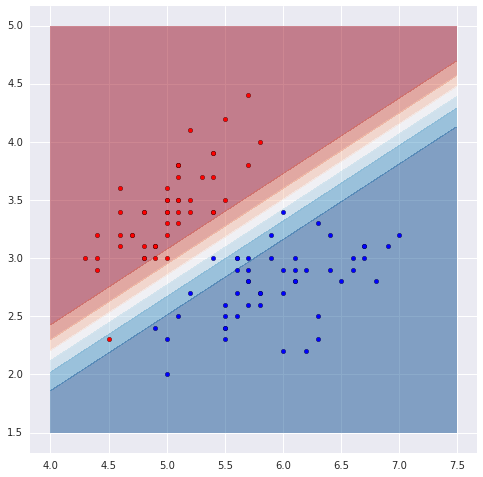

In [203]:
%pylab inline
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

figure(figsize=(8,8))
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2, :]
y = y[y != 2]
X = X[:, [0, 1]]

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=10)
LR.fit(X, y)

X_0 = X[y==0, :]
X_1 = X[y==1, :]


xx, yy = np.meshgrid(np.arange(4., 7.5, 0.01),
                     np.arange(1.5, 5., 0.01))

Z = LR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdBu)

scatter(X_0[:,0], X_0[:,1], c='r')
_ = scatter(X_1[:,0], X_1[:,1], c='b')

...Таким образом, оценки апостериорных вероятностей являются точными только при довольно сильных теоретико-вероятностных предположениях. На практике гарантировать выполнение этих условий вряд ли возможно. Поэтому трактовать выходы сигмоидных функций как вероятности следует с большой осторожностью. На самом деле они дают лишь оценку удалённости объекта от границы классов, нормированную так, чтобы она принимала значения из отрезка [0,1].

Больше информации: 

* https://habrahabr.ru/company/io/blog/265007/
* https://florianhartl.com/logistic-regression-geometric-intuition.html
* http://www.slideshare.net/yandex/voron-mllinslides
* http://www.machinelearning.ru/wiki/index.php?title=Логистическая_регрессия#eq:1